# Creating a Machine Learning Classification Aspect of Raman Noodles 

This is a developer notebook for our supervised Machine Learning Code
Good blog post about supervised vs unsupervised machine learning: https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d

## Prestep (1/5): Importing Modules

In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate


## Pre-step (2/5):Calibration Input

We will use a list of known spectra from our calibration list and put it in hdf5 format with the dataprep.py module. See dataprep.py example for more details. The functions new_hdf5 and add_calibration should only be called once or else an File Already exists error will be raised. We use a sapphire data spectra as a calibration compound due to a sapphire ball in the reactor system. Other compounds not within the formic acid reaction are commented out due to the stoichiometry we did above; however, a truly unknown spectra might need several more calibration datasets.

###### NOTE: If your interpolated spectra has unneccessary additions to its calibration spectra; take note because you need to still identify these false negatives. Later, you will need to remove the false negatives from the dataset. 

###### NOTE: Make sure to look at peakidentify and chemical reactions to note unnecessary additions to your calibration spectra before continuing to the machine learning

In [2]:
dataprep.new_hdf5('formic_supervised_calibration_dataset')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')


Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model.
     Results saved to formic_supervised_c

In [3]:
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethylene_test.xlsx', 'ethylene')

In [4]:
dataprep.view_hdf5('formic_supervised_calibration_dataset.hdf5')

**** formic_supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


## Prestep (3/5): Creating Interpolated Calibration Dataset
The interpolatespectra function randomly combines the spectra data of fed-in known spectra; choosing a target compound from the calibration spectra list

##### NOTE: IT IS RECOMMENDED that large interpolated data files will take days to finish peak fitting, THUS MAKE THE INTERPOLATED FILES IN ANOTHER NOTEBOOK AND RUN THAT NOTEBOOK OVERNIGHT.

##### This notebook uses a prexisting large interpolated/peak fitted file.

In [5]:
# dataprep.new_hdf5('combined_calibration_dataset')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'Propane')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'Ethane')
# dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'Acetaldehyde')

In [6]:
# # first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# # compound = 'water'
# hdf5_filename = 'combined_calibration_dataset.hdf5'
# spectra_count = 1
# hdf5 = h5py.File(hdf5_filename, 'r')
# # get list of compounds from hdf5 file
# y_data_list = []
# compound_list = list(hdf5.keys())
# for target_compound in compound_list:
#     x_data, y_data, labels = interpolatespectra.generate_spectra_dataset(hdf5_filename, target_compound, spectra_count)
#     y_data_list.append(y_data)

In [7]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [8]:
# first a function that will return a normalized interpolated spectra
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count, x_data, y_data, labels)


In [9]:
# frames

In [10]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

Example of Interpolated Spectra

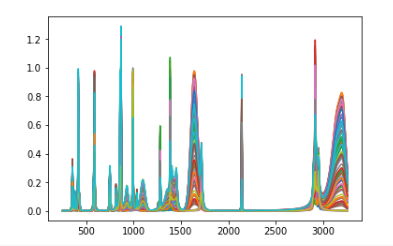


## Prestep (4/5): Creating Ideal Test / Train /Validation Data Sets from Interpolated Calibration Dataset
Besides the teaching provided from the DIRECT program where you can find information on the course on their open source GitHub page: (https://github.com/UWDIRECT) there are a ton of online resources for creating the dataset. One useful one we found to suplement our education was: https://www.dataquest.io/blog/sci-kit-learn-tutorial/ 

The interpolatespectra function randomly combines the spectra data of fed-in known spectra; choosing a target compound from the calibration spectra list



##### NOTE: WE will be using a preexisting interpolated spectra file.

# WARNING!: SAVE your hdf5 file before continuing
#### The peakassignment function will save peak labels to your hdf5 file

In [11]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/formic_supervised_calibration_interpL-Copy1.hdf5')

**** ../ramandecompy/tests/test_files/formic_supervised_calibration_interpL-Copy1.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    resid

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    128
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    129
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |  

|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    152
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    153
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    154
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    | 

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    40
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    41
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    42
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    8
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    80
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    81
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    P

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    114
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    115
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    116
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    | 

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    146
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    147
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    148
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    | 

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    33
|    |    Peak_01
|    |    Peak_02
|    |    

|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    67
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    68
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    69
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    106
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    107
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    108
|    |    Peak_01
|    | 

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    142
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    143
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    144
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    | 

|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    25
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    26
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    6
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    counts
|    |    residuals
|    |    wavenumber
|    60
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    P

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    95
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    96
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    97
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    133
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    134
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    135
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    | 

|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_

|    56
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    counts
|    |    residuals
|    |    wavenumber
|    57
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    58
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
| 

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    95
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    96
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    97
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    128
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    counts
|    |    residuals
|    |    wavenumber
|    129
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |  

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    19
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    2
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    P

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    6
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    60
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    counts
|    |    residuals
|    |    wavenumber
|    61
|    |    Peak_01
|    |    Peak_02

|    |    counts
|    |    residuals
|    |    wavenumber
|    99
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
interp_water
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residual

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    131
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    132
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    133
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    | 

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    169
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    17
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    18
|    |    Peak_01
|    |    Peak_02
|    |   

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    5
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    P

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    9
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    90
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    91
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    P

In [12]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/formic_supervised_calibration_interpL-Copy1.hdf5'
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5'

In [13]:
key_list = interpolatespectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/100', 'interp_FormicAcid/101', 'interp_FormicAcid/102', 'interp_FormicAcid/103', 'interp_FormicAcid/104', 'interp_FormicAcid/105', 'interp_FormicAcid/106', 'interp_FormicAcid/107', 'interp_FormicAcid/108', 'interp_FormicAcid/109', 'interp_FormicAcid/11', 'interp_FormicAcid/110', 'interp_FormicAcid/111', 'interp_FormicAcid/112', 'interp_FormicAcid/113', 'interp_FormicAcid/114', 'interp_FormicAcid/115', 'interp_FormicAcid/116', 'interp_FormicAcid/117', 'interp_FormicAcid/118', 'interp_FormicAcid/119', 'interp_FormicAcid/12', 'interp_FormicAcid/120', 'interp_FormicAcid/121', 'interp_FormicAcid/122', 'interp_FormicAcid/123', 'interp_FormicAcid/124', 'interp_FormicAcid/125', 'interp_FormicAcid/126', 'interp_FormicAcid/127', 'interp_FormicAcid/128', 'interp_FormicAcid/129', 'interp_FormicAcid/13', 'interp_FormicAcid/130', 'interp_FormicAcid/131', 'interp_FormicAcid/132', 'interp_FormicAcid/133', 'interp

In [14]:
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/formic_supervised_calibration_interpL-Copy1.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 20, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
The

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for Formic

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
The 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carb

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The pea

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carb

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we fou

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 10

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
Th

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.]
The peaks that we found f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
Th

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 0.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we foun

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
294

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we foun

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}


The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 0. 0.]
The 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that w

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 1. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are:

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 


{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for Formic

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 1. 1. 0. 1. 1. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon diox

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 1

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 0.0}
The peaks that we

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The pea

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we f

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 0.0}
The peaks that we found for FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide a

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1.

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks tha

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}


In [15]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [16]:
cal = pd.DataFrame()

#### The calibration spectra dataframe has its labels encoded to unique number values

In [17]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
cal['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
# cal['center']= result[:][2]

In [18]:
cal.head()

,fraction,sigma,center,amplitude,fwhm,height,auc,labelencoded,labels
0,0.701625,4.39344,355,2.17319,8.78688,0.179796,2.15196,6,['hydrogen']
1,3.86902e-10,3.99499,379,0.983744,7.98998,0.115666,0.983744,7,['sapphire']
2,0.729186,3.64579,417,9.0464,7.29158,0.891575,8.99759,7,['sapphire']
3,1,4.96266,587,7.45277,9.92531,0.478028,7.41332,5,"['hydrogen', 'sapphire']"
4,0.11716,6.77923,750,4.14754,13.5585,0.276521,4.14502,7,['sapphire']


## Prestep (5/5): Creating Experimental Data Sets from Imported Datasets
Besides the teaching provided from the DIRECT program where you can find information on the course on their open source GitHub page: (https://github.com/UWDIRECT) there are a ton of online resources for creating the dataset. One useful one we found to suplement our education was: https://www.dataquest.io/blog/sci-kit-learn-tutorial/ 

Takes in all experimental data



##### NOTE: WE will be using a preexisting interpolated spectra file.

In [19]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    75s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
420C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|  

In [20]:
key_list = interpolatespectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
len(key_list)

50

In [21]:
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 20, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxi

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
294

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found fo

In [22]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [23]:
dat = pd.DataFrame()

In [24]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
# dat['center']= result[:][2]

In [25]:
dat.head()

fraction    sigma  center amplitude     fwhm   height      auc  \
300C/25s 0  2.66632e-06  9.47784  314.77   251.853  18.9557  12.4817  251.852   
         1     0.506813   4.0129  378.71   1034.01   8.0258   101.26  1028.59   
         2     0.636782  3.84759  418.14   7306.16  7.69519  708.864  7270.35   
         3  2.55231e-05  2.69962  448.67   193.734  5.39924  33.7084  193.741   
         4     0.188666  4.21062  578.11   1090.47  8.42124   114.25  1089.49   

            labelencoded                    labels  
300C/25s 0             3            ['Unassigned']  
         1             8              ['sapphire']  
         2             8              ['sapphire']  
         3             3            ['Unassigned']  
         4             6  ['hydrogen', 'sapphire']

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [27]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','auc','height','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

# Recursive Feature Elimination with Linear Regression

In [28]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.332117


# LASSO Feature Selection 

In [29]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import sys
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline


fraction    -0.759147
sigma        0.723178
amplitude    3.863285
fwhm         0.171366
auc         -3.289103
height      -0.028863
center      -1.411308
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

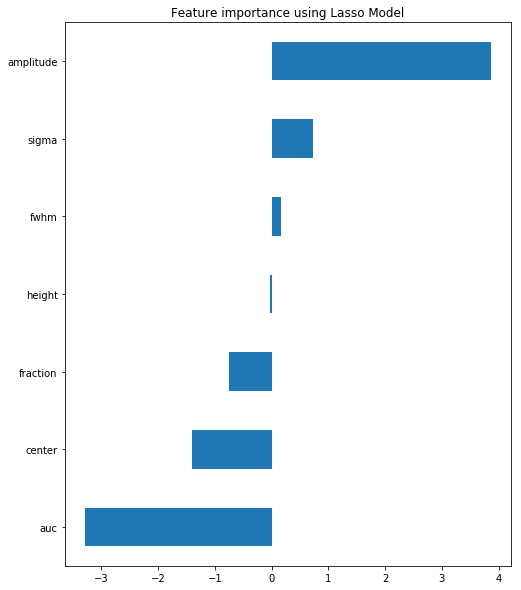

In [30]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to

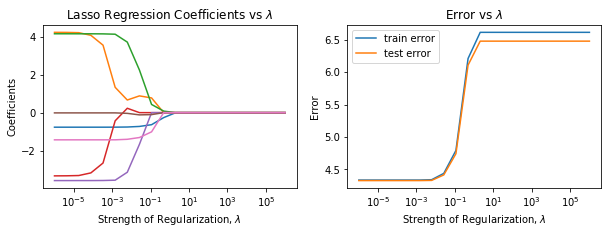

In [31]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Lasso_feature_selectionFormic', dpi=300, bbox_inches='tight')

# Ridge Feature Selection

fraction    -0.765114
sigma        0.448728
amplitude    4.145748
fwhm         0.448728
auc         -3.571959
height      -0.013338
center      -1.429469
dtype: float64
Ridge picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

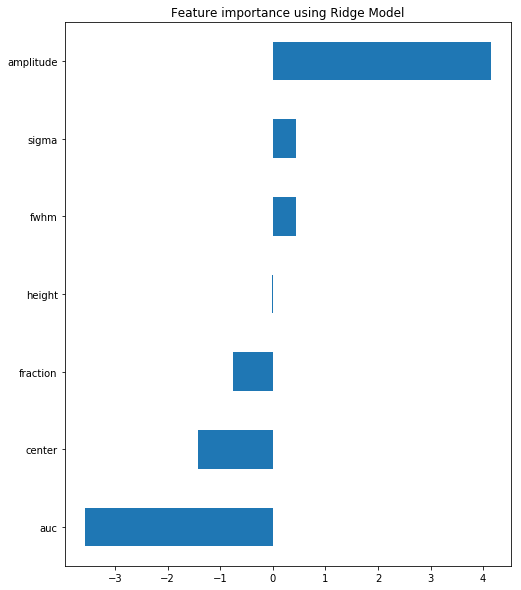

In [32]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## Example of searching the $\alpha$ space in RR RIDGE

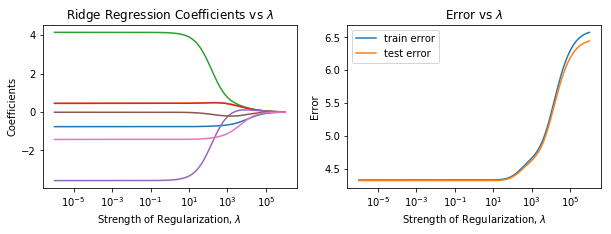

In [33]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Ridge_feature_selectionFormic', dpi=300, bbox_inches='tight')

# Neural network

A helpful resource to learn more about Neural Networks: https://skymind.ai/wiki/neural-network

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
inputs=['fraction','sigma','amplitude','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [36]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt

In [37]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


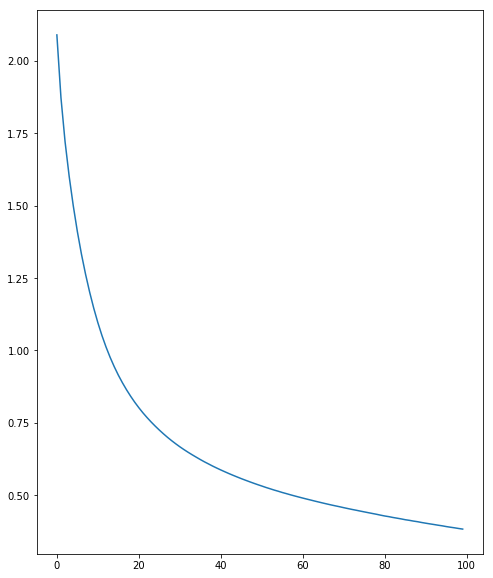

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


(787,)
(787, 4)
Iteration 1, loss = 2.30257969
Iteration 2, loss = 2.29409318
Iteration 3, loss = 2.28162318
Iteration 4, loss = 2.26650818
Iteration 5, loss = 2.24970463
Iteration 6, loss = 2.23249515
Iteration 7, loss = 2.21481883
Iteration 8, loss = 2.19721452
Iteration 9, loss = 2.18061880
Iteration 10, loss = 2.16328437
Iteration 11, loss = 2.14711409
Iteration 12, loss = 2.13144830
Iteration 13, loss = 2.11632857
Iteration 14, loss = 2.10128260
Iteration 15, loss = 2.08724982
Iteration 16, loss = 2.07344619
Iteration 17, loss = 2.06019087
Iteration 18, loss = 2.04689591
Iteration 19, loss = 2.03422965
Iteration 20, loss = 2.02160554
Iteration 21, loss = 2.00961491
Iteration 22, loss = 1.99770091
Iteration 23, loss = 1.98629118
Iteration 24, loss = 1.97483024
Iteration 25, loss = 1.96370009
Iteration 26, loss = 1.95285324
Iteration 27, loss = 1.94195599
Iteration 28, loss = 1.93135518
Iteration 29, loss = 1.92098311
Iteration 30, loss = 1.91078332
Iteration 31, loss = 1.90068985
I

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


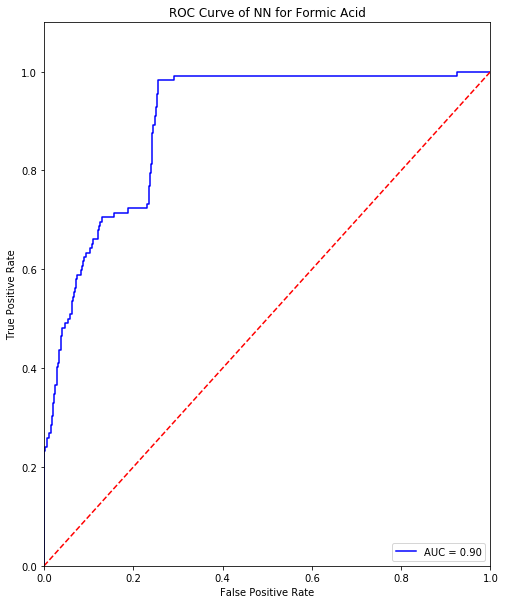

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()
# instantiate the model with the best known parameters
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
# make a prediction for an out-of-sample observation
# print the shapes of the new y objects


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
print(y_exp.shape)
print(X_exp_normalized.shape)


clf.fit(X_exp_normalized, y_exp)
rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN for Formic Acid')
plt.show()

In [39]:
fpr.mean()

0.12989106753812635

In [40]:
tpr.mean()

0.5862219887955181

Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, loss = 0.65743159
Iteration 33, l

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, loss = 0.65743159
Iteration 33, lo

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, loss = 0.65743159
Iteration 33, l

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.08997880
Iteration 2, loss = 1.87274775
Iteration 3, loss = 1.72103057
Iteration 4, loss = 1.60166928
Iteration 5, loss = 1.49987297
Iteration 6, loss = 1.41057893
Iteration 7, loss = 1.33232953
Iteration 8, loss = 1.26312946
Iteration 9, loss = 1.20118804
Iteration 10, loss = 1.14559405
Iteration 11, loss = 1.09584446
Iteration 12, loss = 1.05135021
Iteration 13, loss = 1.01154338
Iteration 14, loss = 0.97586249
Iteration 15, loss = 0.94368235
Iteration 16, loss = 0.91446851
Iteration 17, loss = 0.88814178
Iteration 18, loss = 0.86391465
Iteration 19, loss = 0.84164661
Iteration 20, loss = 0.82096630
Iteration 21, loss = 0.80200513
Iteration 22, loss = 0.78432487
Iteration 23, loss = 0.76805382
Iteration 24, loss = 0.75270906
Iteration 25, loss = 0.73834073
Iteration 26, loss = 0.72476701
Iteration 27, loss = 0.71189738
Iteration 28, loss = 0.69966633
Iteration 29, loss = 0.68818048
Iteration 30, loss = 0.67737212
Iteration 31, loss = 0.66707891
Iteration 32, los

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


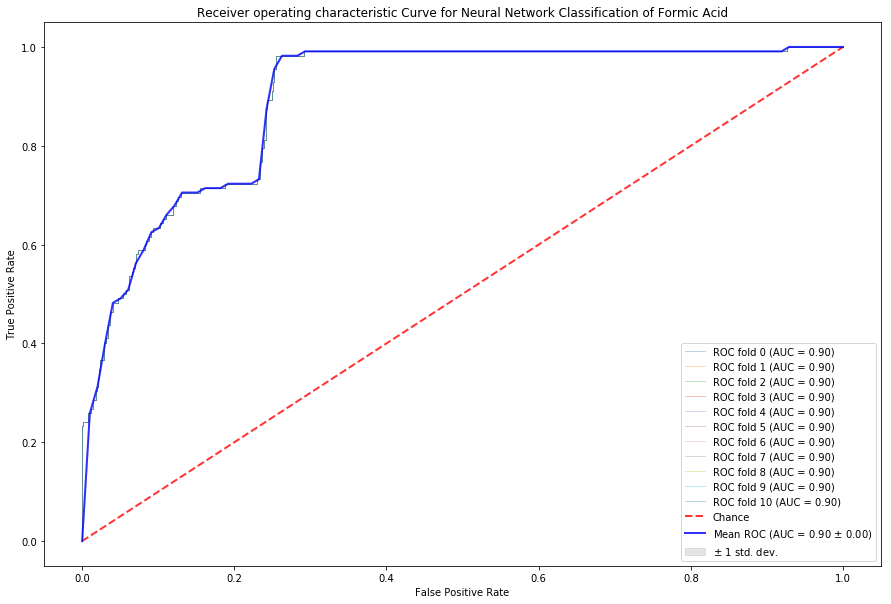

In [41]:
# From SKLEARN
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Classification and ROC analysis
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=11)
plt.figure(figsize=(15,10))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve for Neural Network Classification of Formic Acid')
plt.legend(loc="lower right")
plt.show()

### Accuracy over epochs data

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Training set score: 0.998946
Test set score: 0.998243


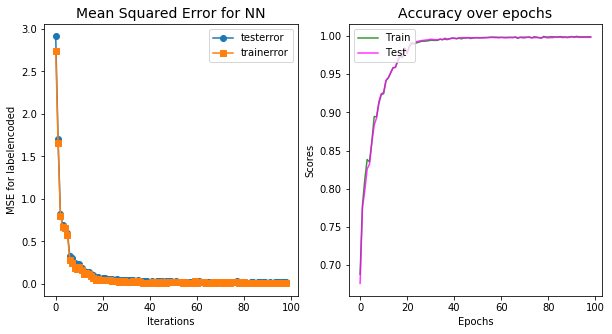

<Figure size 576x720 with 0 Axes>

In [42]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 100
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train, y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.title("Mean Squared Error for NN", fontsize=14)
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()
plt.savefig('NN_accuracyFormic2', dpi=300, bbox_inches='tight')